In [1]:
%pip install jupyter

  Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   -----------------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install pandas
%pip install imblearn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 258.3/258.3 kB 189.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

import pandas as pd 
from imblearn.over_sampling import SMOTE 
from collections import Counter
data = pd.read_csv(r'C:\Users\Sakshi Agarwal\Downloads\archive (6)\creditcard.csv')


X = data.drop('Class', axis=1)
y = data['Class']

print("Original Class Distribution:", Counter(y))
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Resampled Class Distribution:", Counter(y_resampled))
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                           pd.DataFrame(y_resampled, columns=['Class'])], axis=1)
balanced_data.to_csv('balanced_creditcard.csv', index=False)
print("Balanced dataset saved as 'balanced_creditcard.csv'")


Original Class Distribution: Counter({0: 284315, 1: 492})
Resampled Class Distribution: Counter({0: 284315, 1: 284315})
Balanced dataset saved as 'balanced_creditcard.csv'


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42 )


In [ ]:
TRAIN MODELS

In [52]:
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

c:\Users\Sakshi Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

EVALUATE MODELS

In [53]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest
}

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [55]:
for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    if hasattr(model, "predict_proba"):
        auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print("AUC-ROC Score:", auc_roc)
    else:
        print("AUC-ROC Score: Not available (no predict_proba method).")
        
    


Model: Logistic Regression
Confusion Matrix:
 [[56270   593]
 [ 1723 55140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

AUC-ROC Score: 0.9971465672958155

Model: Decision Tree
Confusion Matrix:
 [[56748   115]
 [   59 56804]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

AUC-ROC Score: 0.99847000685859

Model: Random Forest
Confusion Matrix:
 [[56846    17]
 [    1 56862]]
Classifica

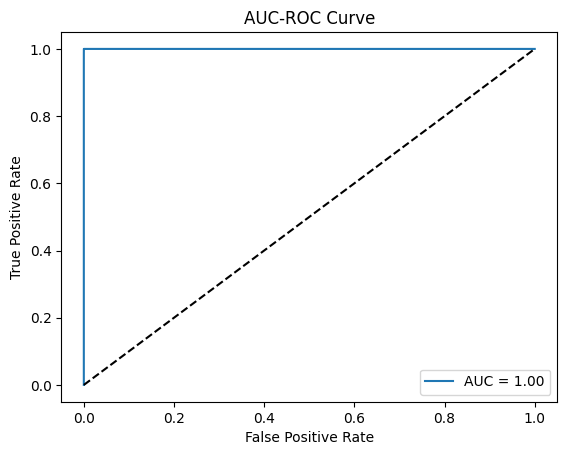

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()
